Индивидуальный проект: **World population in the near future**

Автор: **Шишкин Александр Эдуардович**

Проверяющий: **ФИО**

Ссылка на датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных
4. Генерация и селекция признаков
5. Выбор метода/алгоритма, модели, архитектуры
6. Генерация наборов для обучения, тестирования и валидации
7. Выбор метрики оценки качества (MSE)
8. Развертывание и работа модели, визуализация результатов
9. Выводы

## 1. Цель и задачи исследования


**Цель: на основе имеющихся данных о населении планеты примерно предсказать население в ближайшем будущем**

Задачи:
- Обозначить какие данные имеются в распоряжении.
- Установить как эти данные могут быть использованы
- Применить методы изучения объемов данных для своего исследования
- Привести результаты исследования

## 2. Описание набора данных

Данные взяты из: 

[https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset]


### Описание данных

Датасет представлен в виде каких файлов? Сколько их?
Как собирались данные? Для чего — просто коротко о датасете.
Описать объем данных.

- Выборка включает 234 записей и 17 признаков (строки и столбцы соответственно).
- Целевая переменная **"year" Population** — население на момент данного года(year).

- Количественные переменные:
    - **Area** — площать страны;
    - **Density** — плотность населения(на км^2);
    - **Growth rate** — темп роста населения;
    - **World Population Percentage** — процент от мирового населения;
    - **Rank** - место по населению в мире;
- Категориальный переменные:
    - **CCA3** — сокращенное название страны;
    - **Country/Territory** — название страны/территории проживания;
    - **Capital** — столица страны;
    - **Continent** — континент местонахождения страны;

In [1]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
df = pd.read_csv("world_population.csv")

Проверим, все ли нормально считалось – посмотрим на первые 5 строк (метод `head`).

In [3]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


**Посмотрим на размер данных и названия признаков.**

In [4]:
print(df.shape)
print(df.columns.values)

(234, 17)
['Rank' 'CCA3' 'Country/Territory' 'Capital' 'Continent' '2022 Population'
 '2020 Population' '2015 Population' '2010 Population' '2000 Population'
 '1990 Population' '1980 Population' '1970 Population' 'Area (km²)'
 'Density (per km²)' 'Growth Rate' 'World Population Percentage']


In [5]:
df.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [6]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


##  3. Разведочный анализ данных

**Сортировка по признаку "2022 Population".** (население на момент написания проекта)

In [7]:
df.sort_values(by='2022 Population', ascending=False).head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


## 4. Генерация и селекция признаков

Попробуем сделать полезные выводы на основе представленных нам входных данных, я выберу признак "Процент от мирового населения".

In [8]:
df["World Population Percentage"].value_counts()

0.00    57
0.01    18
0.03    11
0.07    11
0.02     9
        ..
3.45     1
1.11     1
0.74     1
0.24     1
0.20     1
Name: World Population Percentage, Length: 70, dtype: int64

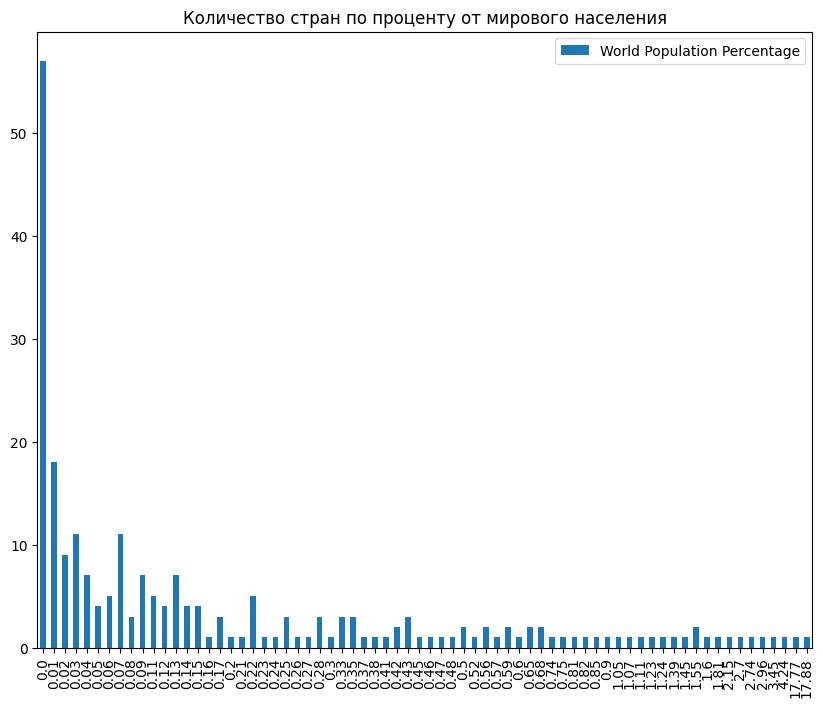

In [9]:
df["World Population Percentage"].value_counts().sort_index(0).plot(kind="bar", label="World Population Percentage")
plt.legend()
plt.title("Количество стран по проценту от мирового населения");

Из этого графика можно сделать вывод что маленьких стран, не занимающих и 1% от мирового населения, гораздо больше, чем крупных стран.

**Найдём население по всему миру в определенные года**

Сделаем таблицу с годами и населением в мире на данные года

In [10]:
df[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']].append(df.sum(axis=0), ignore_index=True).iloc[-1].iloc[0:8]

1970 Population    3694136661
1980 Population    4442400371
1990 Population    5314191665
2000 Population    6147055703
2010 Population    6983784998
2015 Population    7424809761
2020 Population    7839250603
2022 Population    7973413042
Name: 234, dtype: object

In [11]:
population = pd.DataFrame([[1970, 3694136661], [1980, 4442400371], [1990, 5314191665], [2000, 6147055703], [2010, 6983784998], [2015, 7424809761], [2020, 7839250603], [2022, 7973413042]], columns=['year', 'population'])
population.head(10)

,year,population
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998
5,2015,7424809761
6,2020,7839250603
7,2022,7973413042


## 5. Выбор метода/алгоритма, модели, архитектуры


Построим график, становиться видно, что для решения задачи подойдёт линейная регрессия 

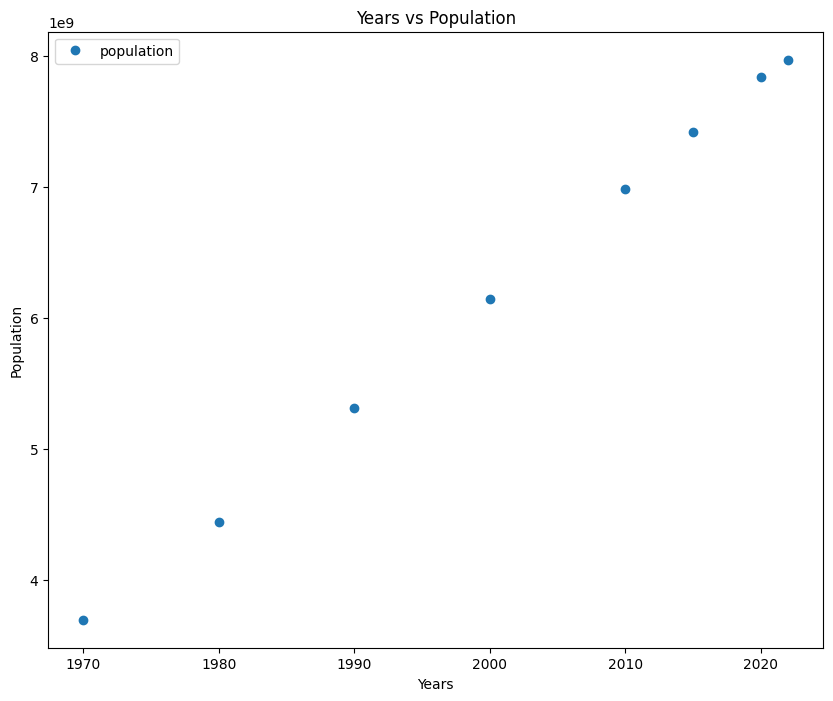

In [12]:
population.plot(x='year', y='population', style='o') 
plt.title('Years vs Population') 
plt.xlabel('Years') 
plt.ylabel('Population') 
plt.show()

## 6. Генерация наборов для обучения, тестирования и валидации


In [13]:
X = population.iloc[:, :-1].values 
y = population.iloc[:, 1].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
model = regressor.fit(X_train, y_train)

b_sq = model.intercept_
k_sq = model.coef_
print("Коэффициенты b0 и k в уравнении линейной регрессии y=kx + b0")
print("b0 = ", b_sq, " k = ", k_sq[0])

Коэффициенты b0 и k в уравнении линейной регрессии y=kx + b0
b0 =  -160192226618.0601  k =  83172373.11364178


Пример кросс-валидации.

In [14]:
import numpy
from sklearn.model_selection import KFold

# датасет
data = numpy.array([3694136661, 4442400371, 5314191665, 6147055703, 7424809761, 7839250603])

# подготовьте кросс валидацию
kfold = KFold(n_splits=3)

# перечисление выборок датасета
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [5314191665 6147055703 7424809761 7839250603], test: [3694136661 4442400371]
train: [3694136661 4442400371 7424809761 7839250603], test: [5314191665 6147055703]
train: [3694136661 4442400371 5314191665 6147055703], test: [7424809761 7839250603]


## Вот как будет выглядеть этот график

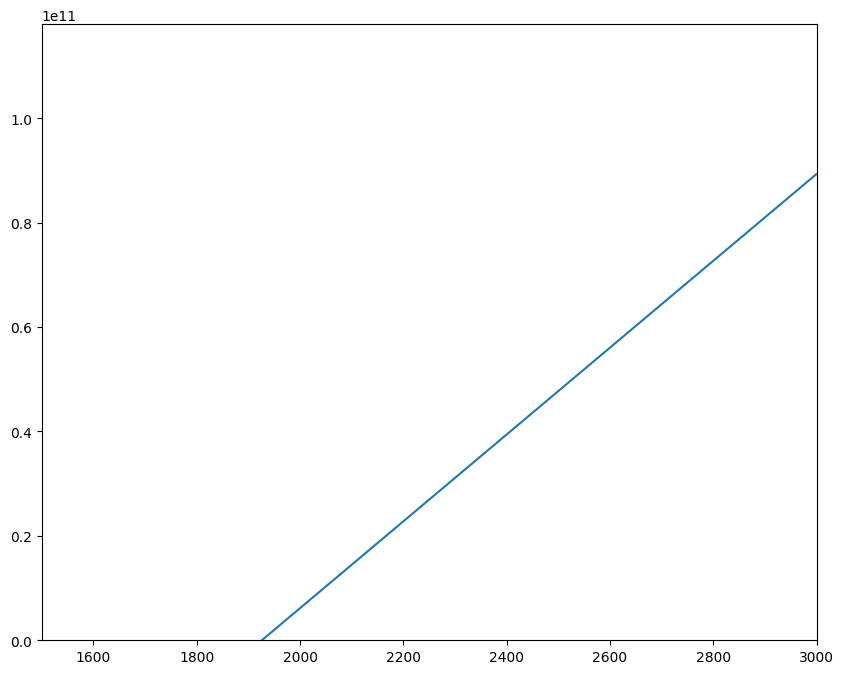

In [15]:
def f(t):
    return k_sq[0]*t + b_sq

t1 = np.arange(0.0, 3000.0, 1)

plt.figure()
plt.plot(f(t1))
plt.ylim(0, 117973413042)
plt.xlim(1500, 3000)
plt.show()

Плохо то, что уже примерно на 1900 году наша модель показывает что население равно нулю, что конечно же неправда, но, по большому счёту на это всё равно, ведь наша задача предсказать население в будущем.

## 7. Выбор метрики оценки качества (MSE)


Выберем метрику MSE, так как возведение в квадрат наилучшим образом оценить качество работы нашей модели.

In [16]:
y_pred = model.predict(X_test)

Перед оценкой стоит экспонировать тестовые и пересказанные значения, так как использовать MSE для логарифмов будет нецелесообразно, поскольку трудно будет оценить полученные результаты.

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('mse: %.3f' % (mse))

mse: 292869234891414.750


Число достаточно большое, но не нужно пугаться, ведь и мы не с маленькими числами проводим здесь вычисления, население земли не может быть маленьким в 20-21 столетии, поэтому найдём корень(так как находили MSE) и поймём что полученное значение очень даже устраивает.

In [18]:
import math
print("mse^(1/2) = ", math.sqrt(mse))

mse^(1/2) =  17113422.652742926


Таким образом, население планеты отклоняется всего лишь на население нескольких столиц мира.

## 8. Развертывание и работа модели, визуализация результатов.




Теперь мы можем подставить любое число в получившееся уравнение и получить примерное значение населения хоть для десятой доли какого-либо года.

In [19]:
print("Введите год для которого необходимо рассчитать население земли: ")
x = int(input())
print("Население земли на ", x, " год: ", k_sq[0]*x + b_sq)

Введите год для которого необходимо рассчитать население земли: 
2030
Население земли на  2030  год:  8647690802.63272


## 9. Выводы

В процессе выполнения данной работы были изучены и использованы данные за последнее столетие о населении земного шара. С помощью линейной регрессии получено уравнение населения земли, зависящее от года, в котором нужно найти население. Очевидно, что для более точного предсказания таких данных необходимо гораздо больше, но точность выполненного исследования можно будет проверить экспериментальным путём уже очень скоро)

Были применены способы работы с большими объемами данных и библиотеки для машинного обучения на языке python. Отточены навыки изучения и анализа большого объёма информации.